
# How are in-demand skills trending for Data Analysts?

### Methology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand


In [3]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Mei\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Dec 19 12:21:24 2024).


In [4]:
df_DA_aus = df[
    (df['job_title'] == 'Data Analyst')&
    (df['job_country'] == 'Australia')
].copy()

In [5]:
# aggregate on monthly basis
df_DA_aus['job_posted_month_num'] = df_DA_aus['job_posted_date'].dt.month

In [6]:
# explode dataframe on job skills
df_DA_aus_explode =df_DA_aus.explode('job_skills')

In [7]:
# pivot the exploded dataframe
df_DA_aus_pivot = df_DA_aus_explode.pivot_table(
    index='job_posted_month_num',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# create new row 'Total' to show at bottom of pivot table
df_DA_aus_pivot.loc['Total'] = df_DA_aus_pivot.sum()


# sort dataframe by value of row from large to small and assign it back to the original dataframe
df_DA_aus_pivot = df_DA_aus_pivot[df_DA_aus_pivot.loc['Total'].sort_values(ascending=False).index]


# drop 'Total' row
df_DA_aus_pivot = df_DA_aus_pivot.drop('Total')

df_DA_aus_pivot


job_skills,sql,power bi,python,excel,tableau,r,sas,sql server,aws,snowflake,...,microsoft teams,matplotlib,golang,linux,jupyter,scikit-learn,seaborn,julia,plotly,neo4j
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,34,15,21,18,13,14,4,3,5,3,...,0,0,0,0,0,1,0,1,0,0
2,9,4,4,6,2,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,3,4,6,6,2,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
4,10,6,6,5,5,6,4,2,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,4,2,4,1,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,10,13,7,8,7,4,6,0,2,2,...,0,0,0,0,0,0,0,0,0,0
7,28,21,18,13,15,7,6,3,4,6,...,0,0,0,1,0,0,0,0,1,1
8,22,15,14,13,12,8,2,2,4,6,...,1,0,0,0,0,0,0,0,0,0
9,33,17,14,13,9,2,4,5,1,3,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# find job postings by month
DA_total = df_DA_aus.groupby('job_posted_month_num').size()

In [11]:
# find %

df_DA_aus_percent = df_DA_aus_pivot.div(DA_total/100, axis=0)

In [12]:
# convert month from number to text

df_DA_aus_percent = df_DA_aus_percent.reset_index()
df_DA_aus_percent['job_posted_month'] = df_DA_aus_percent['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_aus_percent = df_DA_aus_percent.set_index('job_posted_month')
df_DA_aus_percent = df_DA_aus_percent.drop(columns='job_posted_month_num')

df_DA_aus_percent


job_skills,sql,power bi,python,excel,tableau,r,sas,sql server,aws,snowflake,...,microsoft teams,matplotlib,golang,linux,jupyter,scikit-learn,seaborn,julia,plotly,neo4j
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,64.150943,28.301887,39.622642,33.962264,24.528302,26.415094,7.547170,5.660377,9.433962,5.660377,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.886792,0.000000,1.886792,0.000000,0.000000
Feb,50.000000,22.222222,22.222222,33.333333,11.111111,0.000000,22.222222,5.555556,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.333333,12.500000,16.666667,25.000000,25.000000,8.333333,0.000000,4.166667,8.333333,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,47.619048,28.571429,28.571429,23.809524,23.809524,28.571429,19.047619,9.523810,4.761905,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.555556,44.444444,22.222222,44.444444,11.111111,22.222222,0.000000,11.111111,11.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,41.666667,54.166667,29.166667,33.333333,29.166667,16.666667,25.000000,0.000000,8.333333,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,52.830189,39.622642,33.962264,24.528302,28.301887,13.207547,11.320755,5.660377,7.547170,11.320755,...,0.000000,0.000000,0.000000,1.886792,0.000000,0.000000,0.000000,0.000000,1.886792,1.886792
Aug,52.380952,35.714286,33.333333,30.952381,28.571429,19.047619,4.761905,4.761905,9.523810,14.285714,...,2.380952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.098361,27.868852,22.950820,21.311475,14.754098,3.278689,6.557377,8.196721,1.639344,4.918033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


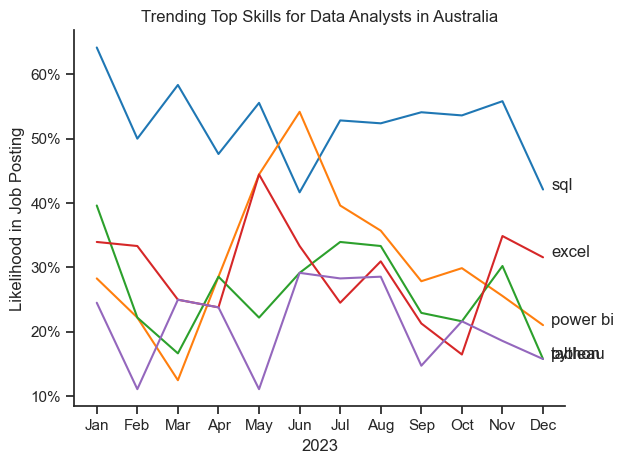

In [14]:
# plot

df_plot = df_DA_aus_percent.iloc[:,:5]

sns.lineplot(
    data=df_plot,
    dashes=False,
    palette='tab10'
)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Australia')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

# change yaxis to percentage
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# use for loop to add label to each line
for i in range (5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])

plt.tight_layout()